In [1]:
# THis will be the first system where I actually train the real brain with RL
# The traces will actually be fake at first, to get initial non-zero probabilities for the relevant actions
# That will be repeated for other 'custom actions' when I need it

In [2]:
from game import *

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
game_settings = BIG_tool_use_advanced_2_5
game_settings.gameSize = 224 # for compatibility with brain's expected size
G = discreteGame(game_settings) # kind of a waste; will only call this object to generate random versions of itself

In [4]:
G2 = discreteGame(G.random_bare_settings(gameSize=224, max_agent_offset=0.5))

In [5]:
import matplotlib.pyplot as plt

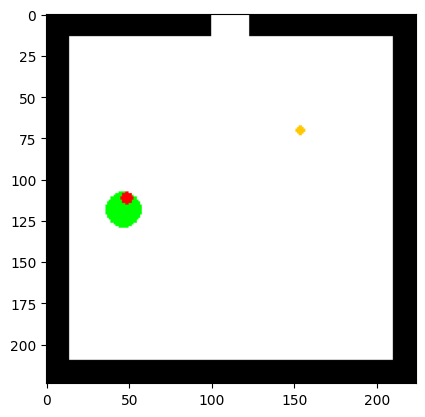

In [6]:
#G2.settings.direction = 0
#G2.universal_update()
plt.imshow(G2.getData())

In [7]:
G2.settings.__dict__

{'gameSize': 224,
 'direction': 2.8261648916783506,
 'agent_x': 0.5329540921699232,
 'agent_y': 0.2136515380088836,
 'agent_r': 0.05,
 'gold_r': 0.015625,
 'gold': [(0.32060112223991427, 0.6903890531835468)],
 'walls': [[0, 0, 0.0625, 0.45, 0],
  [0, 0.55, 0.0625, 0.45, 0],
  [0, 0, 1.0, 0.0625, 0],
  [0, 0.9375, 1.0, 0.0625, 0],
  [0.9375, 0, 0.0625, 1.0, 0]]}

In [8]:
G2.direction_angle(G2.settings.agent_x, G2.settings.agent_y, G2.settings.gold[0][0], G2.settings.gold[0][1])

1.9898429573471743

In [9]:
# checks if you will intersect the gold by moving forward only
# does not check walls or anything
def will_intersect_forward(G):
    gx, gy = G.settings.gold[0]
    ax, ay = G.settings.agent_x, G.settings.agent_y
    # turns the gold into the agent's field of reference; 
    # then, check if it's in front of you and within the line you'll sweep while moving forward
    rel_gx, rel_gy = G.backRot(gx-ax, gy-ay, G.settings.direction)
    #print(rel_gx)
    #print(rel_gy)
    return (rel_gx > 0) and (abs(rel_gy) < G.settings.agent_r)

In [10]:
will_intersect_forward(G2)

0.34977129092499226
-0.3873402719285357


False

In [11]:
import math
-1 % (2 * math.pi)

5.283185307179586

In [12]:
import math
tau = 2*math.pi

# True if the shortest path is turning clockwise (for a forward trajectory)
# False if you should turn counterclockwise instead
# turning anticlockwise increases 'direction' value
# turning clockwise decreases 'direction' value
def should_turn_anticlockwise_forward(G):
    gx, gy = G.settings.gold[0]
    ax, ay = G.settings.agent_x, G.settings.agent_y
    theta = G.settings.direction
    theta_to_gold = G.direction_angle(ax, ay, gx, gy)
    cw_theta = (theta - theta_to_gold) % tau
    #print(cw_theta)
    acw_theta = (theta_to_gold - theta) % tau
    #print(acw_theta)
    return acw_theta < cw_theta

In [13]:
should_turn_anticlockwise_forward(G2)

False

In [14]:
# best move right now, bare settings
# can use this, with game, to create track to gold (moving only forward)
def best_move_forward(G):
    if will_intersect_forward(G):
        return 1 # action 1, G.stepForward
    else:
        if should_turn_anticlockwise_forward(G):
            return 4 # action 4, G.swivel_anticlock
        else:
            return 3 # action 3, G.swivel_clock

In [15]:
from copy import deepcopy

def trace_forward(settings, maxlen=1024):
    G = discreteGame(deepcopy(settings))
    reward = 0
    steps = 0
    trace = [] # can also be numpy array or something; just getting something out there
    while reward < 1e-4 and steps < maxlen:
        action = best_move_forward(G)
        trace.append(action)
        reward += G.actions[action]()
        steps += 1
    return trace

In [16]:
trace = trace_forward(G2.settings)

0.34977129092499226
-0.3873402719285357
0.38834329058249595
-0.34865732585529685
0.42266051988231973
-0.3061544171587513
0.4523469920789128
-0.260297216600884
0.4770774559705957
-0.21158814526724287
0.49658095941978875
-0.1605608699363879
0.5106438179613322
-0.1077744561149877
0.5191119559742025
-0.053807242799136845
0.5218925947662587
0.0007494939287106261
0.45939259476625866
0.0007494939287105984
0.39689259476625866
0.0007494939287106261
0.33439259476625866
0.0007494939287106261
0.2718925947662587
0.0007494939287106539
0.2093925947662587
0.0007494939287106678
0.1468925947662587
0.0007494939287106747
0.08439259476625871
0.000749493928710699


In [17]:
trace

[3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1]

In [18]:
ind = 0

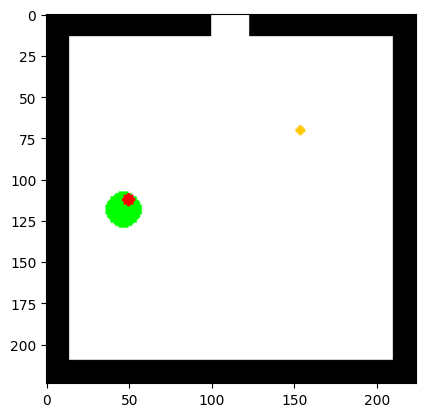

In [19]:
G2.actions[trace[ind]]()
plt.imshow(G2.getData())
ind += 1

In [20]:
# awesome. Professional solver finished.